In [138]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn import metrics
from sklearn.svm import SVC
from xgboost import XGBRegressor
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error as mae

import warnings
warnings.filterwarnings('ignore')


In [139]:
import pandas as pd
import matplotlib.pyplot as plt
from chart_studio import plotly
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode,  plot
from statsmodels.tsa.stattools import adfuller
import numpy as np
import math
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.arima_model import ARIMA
import warnings
import itertools
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab

In [140]:
params = {'legend.fontsize': 'xx-large',
          'figure.figsize': (15, 10),
         'axes.labelsize': 'xx-large',
         'axes.titlesize':'xx-large',
         'xtick.labelsize':'xx-large',
         'ytick.labelsize':'xx-large'}

In [141]:
pylab.rcParams.update(params)
DataFrame=pd.read_csv('PLID_Bookings_Problem1.csv')


In [142]:
display(DataFrame.head())
display(DataFrame.tail())

,Business Unit,Product Family,PLID,Fiscal Quarter,Fiscal Month,Booked_Qty,Booking_Date
0,CSWBU,CBR8,CBR-D121-DS-MOD,Q1 FY2022,AUG FY2022,204,01-08-2016
1,CSWBU,CBR8,CBR-D121-DS-MOD,Q1 FY2022,OCT FY2022,564,01-10-2016
2,CSWBU,CBR8,CBR-D121-DS-MOD,Q1 FY2022,SEP FY2022,1476,01-09-2016
3,CSWBU,CBR8,CBR-D121-DS-MOD,Q1 FY2002,AUG FY2002,374,01-08-2017
4,CSWBU,CBR8,CBR-D121-DS-MOD,Q1 FY2002,OCT FY2002,6094,01-10-2017


,Business Unit,Product Family,PLID,Fiscal Quarter,Fiscal Month,Booked_Qty,Booking_Date
10991,RTOBU,C980040,C9800-40-K9,Q4 FY2011,JUN FY2011,229,01-06-2020
10992,RTOBU,C980040,C9800-40-K9,Q4 FY2011,MAY FY2011,289,01-05-2020
10993,RTOBU,C980040,C9800-40-K9,Q4 FY2012,JUL FY2012,1231,01-07-2021
10994,RTOBU,C980040,C9800-40-K9,Q4 FY2012,JUN FY2012,591,01-06-2021
10995,RTOBU,C980040,C9800-40-K9,Q4 FY2012,MAY FY2012,601,01-05-2021


In [143]:
DataFrame.columns = DataFrame.columns.str.lower()

In [144]:
DataFrame.columns

Index(['business unit', 'product family', 'plid', 'fiscal quarter',
       'fiscal month', 'booked_qty', 'booking_date'],
      dtype='object')

In [145]:
DataFrame = DataFrame.rename(columns={'business unit':'business_unit', 
                        'product family':'product_family', 
                        'plid':'plid', 
                        'fiscal quarter':'fiscal_quarter', 
                        'fiscal_month':'fiscal_month', 
                        'booked_qty':'booked_qty', 
                        'booking_date':'booking_date'})

In [146]:
DataFrame.plid.value_counts()

A9K1000-ESP100       114
SFP-10G-LR           114
ISR4451-X/K9         106
CPAK-100G-LR4        103
N9K-C9508            101
                    ... 
NC-57-36H6D-S          9
UCS-CPU-I8368          9
UCS-CPU-A7763          9
NCS-57C3-MODS-SYS      7
CS-DESK-K9             7
Name: plid, Length: 250, dtype: int64

In [147]:
DataFrame.product_family.value_counts()

PHONVOC    572
UCSCPU     538
C9300      458
C9400      424
N9300      414
          ... 
N3000       28
CAT8200     25
HXCPU       21
UCSHDD      11
UCSX        11
Name: product_family, Length: 73, dtype: int64

In [148]:
DataFrame.business_unit.value_counts()

UOPBLRBU    1675
SRSBU       1392
CSA         1271
TOASTBU     1012
UCEBU        917
QKBU         732
CRBU         725
BATBU        615
OTBU         499
ERBU         488
CVEBU        426
EBBU         343
RTOBU        259
ECBU         204
CSWBU        151
IOTBU        149
NGFWBU        69
CPBU          69
Name: business_unit, dtype: int64

In [149]:
DataFrame.isna().sum()

business_unit     0
product_family    0
plid              0
fiscal_quarter    0
fiscal month      0
booked_qty        0
booking_date      0
dtype: int64

In [150]:
display(DataFrame.head())
display(DataFrame.tail())

,business_unit,product_family,plid,fiscal_quarter,fiscal month,booked_qty,booking_date
0,CSWBU,CBR8,CBR-D121-DS-MOD,Q1 FY2022,AUG FY2022,204,01-08-2016
1,CSWBU,CBR8,CBR-D121-DS-MOD,Q1 FY2022,OCT FY2022,564,01-10-2016
2,CSWBU,CBR8,CBR-D121-DS-MOD,Q1 FY2022,SEP FY2022,1476,01-09-2016
3,CSWBU,CBR8,CBR-D121-DS-MOD,Q1 FY2002,AUG FY2002,374,01-08-2017
4,CSWBU,CBR8,CBR-D121-DS-MOD,Q1 FY2002,OCT FY2002,6094,01-10-2017


,business_unit,product_family,plid,fiscal_quarter,fiscal month,booked_qty,booking_date
10991,RTOBU,C980040,C9800-40-K9,Q4 FY2011,JUN FY2011,229,01-06-2020
10992,RTOBU,C980040,C9800-40-K9,Q4 FY2011,MAY FY2011,289,01-05-2020
10993,RTOBU,C980040,C9800-40-K9,Q4 FY2012,JUL FY2012,1231,01-07-2021
10994,RTOBU,C980040,C9800-40-K9,Q4 FY2012,JUN FY2012,591,01-06-2021
10995,RTOBU,C980040,C9800-40-K9,Q4 FY2012,MAY FY2012,601,01-05-2021


In [155]:
DataFrame[["day", "month", "year"]] = DataFrame["booking_date"].str.split("-", expand = True)
DataFrame.dropna()
#CHANGING STRING TO NUMERIC
#DataFrame.business_unit = pd.to_numeric(DataFrame['business_unit'], errors='coerce')
#business_unit = DataFrame.business_unit.unique() #GIVES 4 UNQUE WH
display(DataFrame)

,business_unit,product_family,plid,fiscal_quarter,fiscal month,booked_qty,booking_date,day,month,year
0,CSWBU,CBR8,CBR-D121-DS-MOD,Q1 FY2022,AUG FY2022,204,01-08-2016,01,08,2016
1,CSWBU,CBR8,CBR-D121-DS-MOD,Q1 FY2022,OCT FY2022,564,01-10-2016,01,10,2016
2,CSWBU,CBR8,CBR-D121-DS-MOD,Q1 FY2022,SEP FY2022,1476,01-09-2016,01,09,2016
3,CSWBU,CBR8,CBR-D121-DS-MOD,Q1 FY2002,AUG FY2002,374,01-08-2017,01,08,2017
4,CSWBU,CBR8,CBR-D121-DS-MOD,Q1 FY2002,OCT FY2002,6094,01-10-2017,01,10,2017
...,...,...,...,...,...,...,...,...,...,...
10991,RTOBU,C980040,C9800-40-K9,Q4 FY2011,JUN FY2011,229,01-06-2020,01,06,2020
10992,RTOBU,C980040,C9800-40-K9,Q4 FY2011,MAY FY2011,289,01-05-2020,01,05,2020
10993,RTOBU,C980040,C9800-40-K9,Q4 FY2012,JUL FY2012,1231,01-07-2021,01,07,2021
10994,RTOBU,C980040,C9800-40-K9,Q4 FY2012,JUN FY2012,591,01-06-2021,01,06,2021


In [156]:
business_unit = DataFrame.business_unit.unique()

In [157]:
business_unit

array(['CSWBU', 'CPBU', 'CRBU', 'CSA', 'CVEBU', 'EBBU', 'ECBU', 'ERBU',
       'QKBU', 'IOTBU', 'NGFWBU', 'OTBU', 'BATBU', 'SRSBU', 'TOASTBU',
       'UOPBLRBU', 'UCEBU', 'RTOBU'], dtype=object)

In [159]:
DataFrame['year'].unique()

array(['2016', '2017', '2018', '2019', '2020', '2021', '2022', '2015',
       '2014', '2013'], dtype=object)

In [185]:
DataFrame['product_family'].unique()

array(['CBR8', 'DNAHW', '8000', 'NCS55FC', 'NCS5500', 'NCS6000', 'HXCPU',
       'HXSSD', 'UCSB', 'UCSC', 'UCSCPU', 'UCSHDD', 'UCSMEM', 'UCSSSD',
       'UCST', 'UCSX', 'CTSMPS', 'CTSPS', 'CTSQS', 'C9300AG', 'C9500',
       'C9600', 'MDS9000', 'A9K9KFM', 'A9K9000', 'N3000', 'N9300',
       'N9500', 'IE4000', 'FPRHIGH', 'FPRLOW', '15454W', 'NCS1000',
       'NCS4000', 'ONS', 'A9K920', 'NCS540', 'NCS560', 'NCS4200',
       '4300ISR', 'ISR1121', 'A9K1000', 'CAT8200', 'CAT8300', 'CAT8500',
       'ISR1K', 'ISR900', 'VIPTELA', 'WANLAN', 'CPAK100', 'QDD400G',
       'QSFP40G', 'QSFP100', 'SFP10G', 'SEP25G', 'SFPGE', 'C1000',
       'C3560CX', 'C3650', 'C9200', 'C9200L', 'C9300', 'C9300L', 'C9400',
       'PHON3PC', 'PHONVID', 'PHONVOC', 'WPHONE', 'C9105AX', 'C9115AX',
       'C9120AX', 'C9130AX', 'C980040'], dtype=object)

In [261]:
type(DataFrame[['year']=="2013"])

pandas.core.series.Series

In [262]:
import plotly.offline as py
for i in range(0, len(business_unit)):
    BQ=pd.DataFrame(DataFrame[DataFrame['business_unit']== business_unit[i]])
    BQ_2013=BQ[BQ['year']=="2013"]
    print(BQ_2013)
    BQ_2013=pd.DataFrame(BQ.groupby('product_family', as_index=False)['booked_qty'].mean())
    BQ_2013= BQ_2013.sort_values('booked_qty', ascending=False)
    BQ_2014=BQ[BQ['year']=="2014"]
    BQ_2014=pd.DataFrame(BQ.groupby('product_family', as_index=False)['booked_qty'].mean())
    BQ_2014= BQ_2014.sort_values('booked_qty', ascending=False)
    BQ_2015=BQ[BQ['year']=="2015"]
    BQ_2015=pd.DataFrame(BQ.groupby('product_family', as_index=False)['booked_qty'].mean())
    BQ_2015= BQ_2015.sort_values('booked_qty', ascending=False)
    BQ_2016=BQ[BQ['year']=="2016"]
    BQ_2016=pd.DataFrame(BQ.groupby('product_family', as_index=False)['booked_qty'].mean())
    BQ_2016= BQ_2016.sort_values('booked_qty', ascending=False)
    BQ_2017=BQ[BQ['year']=="2017"]
    BQ_2017=pd.DataFrame(BQ.groupby('product_family', as_index=False)['booked_qty'].mean())
    BQ_2017= BQ_2017.sort_values('booked_qty', ascending=False)
    BQ_2018=BQ[BQ['year']=="2018"]
    BQ_2018=pd.DataFrame(BQ.groupby('product_family', as_index=False)['booked_qty'].mean())
    BQ_2018= BQ_2018.sort_values('booked_qty', ascending=False)
    BQ_2019=BQ[BQ['year']=="2019"]
    BQ_2019=pd.DataFrame(BQ.groupby('product_family', as_index=False)['booked_qty'].mean())
    BQ_2019= BQ_2019.sort_values('booked_qty', ascending=False)
    BQ_2020=BQ[BQ['year']=="2020"]
    BQ_2020=pd.DataFrame(BQ.groupby('product_family', as_index=False)['booked_qty'].mean())
    BQ_2020= BQ_2020.sort_values('booked_qty', ascending=False)
    BQ_2021=BQ[BQ['year']=="2021"]
    BQ_2021=pd.DataFrame(BQ.groupby('product_family', as_index=False)['booked_qty'].mean())
    BQ_2021= BQ_2021.sort_values('booked_qty', ascending=False)
    BQ_2022=BQ[BQ['year']=="2022"]
    BQ_2022=pd.DataFrame(BQ.groupby('product_family', as_index=False)['booked_qty'].mean())
    BQ_2022= BQ_2022.sort_values('booked_qty', ascending=False)
    trace1 = go.Bar(x=BQ_2013['product_family'],  y=BQ_2013['booked_qty'], name='Year_2013')
    trace2 = go.Bar(x=BQ_2014['product_family'],  y=BQ_2014['booked_qty'], name='Year_2014')
    trace3 = go.Bar(x=BQ_2015['product_family'],  y=BQ_2015['booked_qty'], name='Year_2015')
    trace4 = go.Bar(x=BQ_2016['product_family'],  y=BQ_2016['booked_qty'], name='Year_2016')
    trace5 = go.Bar(x=BQ_2017['product_family'],  y=BQ_2017['booked_qty'], name='Year_2017')
    trace6 = go.Bar(x=BQ_2018['product_family'],  y=BQ_2018['booked_qty'], name='Year_2018')
    trace7 = go.Bar(x=BQ_2019['product_family'],  y=BQ_2019['booked_qty'], name='Year_2019')
    trace8 = go.Bar(x=BQ_2020['product_family'],  y=BQ_2020['booked_qty'], name='Year_2020')
    trace9 = go.Bar(x=BQ_2021['product_family'],  y=BQ_2021['booked_qty'], name='Year_2021')
    trace10 = go.Bar(x=BQ_2022['product_family'],  y=BQ_2022['booked_qty'], name='Year_2022')
    fig = tools.make_subplots(rows=2, cols=10)
    fig.append_trace(trace10, 1, 1)
    fig.append_trace(trace9, 1, 2)
    fig.append_trace(trace8, 1, 3)
    fig.append_trace(trace7, 1, 4)
    fig.append_trace(trace6, 1, 5)
    fig.append_trace(trace5, 1, 6)
    fig.append_trace(trace4, 1, 7)
    fig.append_trace(trace3, 1, 8)
    fig.append_trace(trace2, 1, 9)
    fig.append_trace(trace1, 1, 10)
    layout=fig['layout'].update(height=500, width=1200, title='booked_qty vs product_family with respect to all years for '+ str (business_unit[i]),xaxis=dict(
        title='product_family',
        titlefont=dict(
            family='Courier New, monospace',
            size=18,
            color='#7f7f7f'
        )
    ),
    yaxis=dict(
        title='booked_qty',
        titlefont=dict(
            family='Courier New, monospace',
            size=18,
            color='#7f7f7f')))
    py.iplot(fig, filename='stacked-subplots')#, layout=layout)
    plot(fig, filename='stacked-subplots')

Empty DataFrame
Columns: [business_unit, product_family, plid, fiscal_quarter, fiscal month, booked_qty, booking_date, day, month, year, Pandas_Datestamp]
Index: []


Empty DataFrame
Columns: [business_unit, product_family, plid, fiscal_quarter, fiscal month, booked_qty, booking_date, day, month, year, Pandas_Datestamp]
Index: []


Empty DataFrame
Columns: [business_unit, product_family, plid, fiscal_quarter, fiscal month, booked_qty, booking_date, day, month, year, Pandas_Datestamp]
Index: []


Empty DataFrame
Columns: [business_unit, product_family, plid, fiscal_quarter, fiscal month, booked_qty, booking_date, day, month, year, Pandas_Datestamp]
Index: []


Empty DataFrame
Columns: [business_unit, product_family, plid, fiscal_quarter, fiscal month, booked_qty, booking_date, day, month, year, Pandas_Datestamp]
Index: []


Empty DataFrame
Columns: [business_unit, product_family, plid, fiscal_quarter, fiscal month, booked_qty, booking_date, day, month, year, Pandas_Datestamp]
Index: []


Empty DataFrame
Columns: [business_unit, product_family, plid, fiscal_quarter, fiscal month, booked_qty, booking_date, day, month, year, Pandas_Datestamp]
Index: []


Empty DataFrame
Columns: [business_unit, product_family, plid, fiscal_quarter, fiscal month, booked_qty, booking_date, day, month, year, Pandas_Datestamp]
Index: []


Empty DataFrame
Columns: [business_unit, product_family, plid, fiscal_quarter, fiscal month, booked_qty, booking_date, day, month, year, Pandas_Datestamp]
Index: []


Empty DataFrame
Columns: [business_unit, product_family, plid, fiscal_quarter, fiscal month, booked_qty, booking_date, day, month, year, Pandas_Datestamp]
Index: []


Empty DataFrame
Columns: [business_unit, product_family, plid, fiscal_quarter, fiscal month, booked_qty, booking_date, day, month, year, Pandas_Datestamp]
Index: []


Empty DataFrame
Columns: [business_unit, product_family, plid, fiscal_quarter, fiscal month, booked_qty, booking_date, day, month, year, Pandas_Datestamp]
Index: []


Empty DataFrame
Columns: [business_unit, product_family, plid, fiscal_quarter, fiscal month, booked_qty, booking_date, day, month, year, Pandas_Datestamp]
Index: []


     business_unit product_family            plid fiscal_quarter fiscal month  \
6166         SRSBU        ISR1121    ISR4451-X/K9      Q3 FY2013   APR FY2013   
6191         SRSBU        ISR1121    ISR4451-X/K9      Q4 FY2013   JUL FY2013   
6192         SRSBU        ISR1121    ISR4451-X/K9      Q4 FY2013   JUN FY2013   
6193         SRSBU        ISR1121    ISR4451-X/K9      Q4 FY2013   MAY FY2013   
6218         SRSBU        A9K1000  A9K1000-ESP100      Q1 FY2013   AUG FY2013   
6219         SRSBU        A9K1000  A9K1000-ESP100      Q1 FY2013   OCT FY2013   
6220         SRSBU        A9K1000  A9K1000-ESP100      Q1 FY2013   SEP FY2013   
6248         SRSBU        A9K1000  A9K1000-ESP100      Q2 FY2013   DEC FY2013   
6249         SRSBU        A9K1000  A9K1000-ESP100      Q2 FY2013   JAN FY2013   
6250         SRSBU        A9K1000  A9K1000-ESP100      Q2 FY2013   NOV FY2013   
6278         SRSBU        A9K1000  A9K1000-ESP100      Q3 FY2013   APR FY2013   
6279         SRSBU        A9

     business_unit product_family           plid fiscal_quarter fiscal month  \
7211       TOASTBU        CPAK100  CPAK-100G-LR4      Q4 FY2013   JUL FY2013   
7769       TOASTBU         SFP10G     SFP-10G-LR      Q1 FY2013   AUG FY2013   
7770       TOASTBU         SFP10G     SFP-10G-LR      Q1 FY2013   OCT FY2013   
7771       TOASTBU         SFP10G     SFP-10G-LR      Q1 FY2013   SEP FY2013   
7799       TOASTBU         SFP10G     SFP-10G-LR      Q2 FY2013   DEC FY2013   
7800       TOASTBU         SFP10G     SFP-10G-LR      Q2 FY2013   JAN FY2013   
7801       TOASTBU         SFP10G     SFP-10G-LR      Q2 FY2013   NOV FY2013   
7829       TOASTBU         SFP10G     SFP-10G-LR      Q3 FY2013   APR FY2013   
7830       TOASTBU         SFP10G     SFP-10G-LR      Q3 FY2013   FEB FY2013   
7831       TOASTBU         SFP10G     SFP-10G-LR      Q3 FY2013   MAR FY2013   
7856       TOASTBU         SFP10G     SFP-10G-LR      Q4 FY2013   JUL FY2013   
7857       TOASTBU         SFP10G     SF

Empty DataFrame
Columns: [business_unit, product_family, plid, fiscal_quarter, fiscal month, booked_qty, booking_date, day, month, year, Pandas_Datestamp]
Index: []


Empty DataFrame
Columns: [business_unit, product_family, plid, fiscal_quarter, fiscal month, booked_qty, booking_date, day, month, year, Pandas_Datestamp]
Index: []


Empty DataFrame
Columns: [business_unit, product_family, plid, fiscal_quarter, fiscal month, booked_qty, booking_date, day, month, year, Pandas_Datestamp]
Index: []


# Function to separate warehouse according to year and concatenate it vertically

In [263]:
DataFrame['business_unit'].unique()

array(['CSWBU', 'CPBU', 'CRBU', 'CSA', 'CVEBU', 'EBBU', 'ECBU', 'ERBU',
       'QKBU', 'IOTBU', 'NGFWBU', 'OTBU', 'BATBU', 'SRSBU', 'TOASTBU',
       'UOPBLRBU', 'UCEBU', 'RTOBU'], dtype=object)

In [264]:
display(DataFrame.head())

,business_unit,product_family,plid,fiscal_quarter,fiscal month,booked_qty,booking_date,day,month,year,Pandas_Datestamp
0,CSWBU,CBR8,CBR-D121-DS-MOD,Q1 FY2022,AUG FY2022,204,01-08-2016,01,08,2016,2016-08-01
1,CSWBU,CBR8,CBR-D121-DS-MOD,Q1 FY2022,OCT FY2022,564,01-10-2016,01,10,2016,2016-10-01
2,CSWBU,CBR8,CBR-D121-DS-MOD,Q1 FY2022,SEP FY2022,1476,01-09-2016,01,09,2016,2016-09-01
3,CSWBU,CBR8,CBR-D121-DS-MOD,Q1 FY2002,AUG FY2002,374,01-08-2017,01,08,2017,2017-08-01
4,CSWBU,CBR8,CBR-D121-DS-MOD,Q1 FY2002,OCT FY2002,6094,01-10-2017,01,10,2017,2017-10-01


In [265]:
DataFrame["Pandas_Datestamp"] = pd.to_datetime(DataFrame["year"] + "-" + DataFrame["month"] + "-" + DataFrame["day"])
DataFrame

,business_unit,product_family,plid,fiscal_quarter,fiscal month,booked_qty,booking_date,day,month,year,Pandas_Datestamp
0,CSWBU,CBR8,CBR-D121-DS-MOD,Q1 FY2022,AUG FY2022,204,01-08-2016,01,08,2016,2016-08-01
1,CSWBU,CBR8,CBR-D121-DS-MOD,Q1 FY2022,OCT FY2022,564,01-10-2016,01,10,2016,2016-10-01
2,CSWBU,CBR8,CBR-D121-DS-MOD,Q1 FY2022,SEP FY2022,1476,01-09-2016,01,09,2016,2016-09-01
3,CSWBU,CBR8,CBR-D121-DS-MOD,Q1 FY2002,AUG FY2002,374,01-08-2017,01,08,2017,2017-08-01
4,CSWBU,CBR8,CBR-D121-DS-MOD,Q1 FY2002,OCT FY2002,6094,01-10-2017,01,10,2017,2017-10-01
...,...,...,...,...,...,...,...,...,...,...,...
10991,RTOBU,C980040,C9800-40-K9,Q4 FY2011,JUN FY2011,229,01-06-2020,01,06,2020,2020-06-01
10992,RTOBU,C980040,C9800-40-K9,Q4 FY2011,MAY FY2011,289,01-05-2020,01,05,2020,2020-05-01
10993,RTOBU,C980040,C9800-40-K9,Q4 FY2012,JUL FY2012,1231,01-07-2021,01,07,2021,2021-07-01
10994,RTOBU,C980040,C9800-40-K9,Q4 FY2012,JUN FY2012,591,01-06-2021,01,06,2021,2021-06-01


In [270]:
#FUNCTION FOR DIFFERENT WAREHOUSES
def diff_business_unit(CSWBU_A):
  
    #SCALING THE ORDER DEMAND
    
    CSWBU=pd.DataFrame(DataFrame[DataFrame['business_unit']== CSWBU_A]) #EXTRACTING A SPECIFIC WAREHOUSE
    cols_to_norm = ['booked_qty'] #SCALING
    CSWBU[cols_to_norm] = CSWBU[cols_to_norm].apply(lambda x: (x - x.min()) / (x.max() - x.min())) #SCALING
    CSWBU.sort_values(by='Pandas_Datestamp')
    #print(CSWBU)
    
    #SEPARATING AS PER YEAR
    CSWBU_2013=CSWBU[CSWBU['year']=="2013"]
    #print(CSWBU_2013)
    CSWBU_2013['month'] = CSWBU_2013['Pandas_Datestamp'].apply(lambda x: x.strftime('%Y-%m-01')) #FIRST DAY OF EVERY MONTH 
    CSWBU_2013=pd.DataFrame(CSWBU_2013.groupby('month', as_index=False)['booked_qty'].mean())
    CSWBU_2013.sort_values(by='month')

    CSWBU_2014=CSWBU[CSWBU['year']=="2014"]
    CSWBU_2014['month'] = CSWBU_2014['Pandas_Datestamp'].apply(lambda x: x.strftime('%Y-%m-01')) #FIRST DAY OF EVERY MONTH
    CSWBU_2014=pd.DataFrame(CSWBU_2014.groupby('month', as_index=False)['booked_qty'].mean())
    CSWBU_2014.sort_values(by='month')

    CSWBU_2015=CSWBU[CSWBU['year']=="2015"]
    CSWBU_2015['month'] = CSWBU_2015['Pandas_Datestamp'].apply(lambda x: x.strftime('%Y-%m-01')) #FIRST DAY OF EVERY MONTH
    CSWBU_2015=pd.DataFrame(CSWBU_2015.groupby('month', as_index=False)['booked_qty'].mean())
    CSWBU_2015.sort_values(by='month')

    CSWBU_2016=CSWBU[CSWBU['year']=="2016"]
    CSWBU_2016['month'] = CSWBU_2016['Pandas_Datestamp'].apply(lambda x: x.strftime('%Y-%m-01'))#FIRST DAY OF EVERY MONTH
    CSWBU_2016=pd.DataFrame(CSWBU_2016.groupby('month', as_index=False)['booked_qty'].mean())
    CSWBU_2016.sort_values(by='month')

    CSWBU_2017=CSWBU[CSWBU['year']=="2017"]
    CSWBU_2017['month'] = CSWBU_2017['Pandas_Datestamp'].apply(lambda x: x.strftime('%Y-%m-01')) #FIRST DAY OF EVERY MONTH
    CSWBU_2017=pd.DataFrame(CSWBU_2017.groupby('month', as_index=False)['booked_qty'].mean())
    CSWBU_2017.sort_values(by='month')
    
    CSWBU_2018=CSWBU[CSWBU['year']=="2018"]
    CSWBU_2018['month'] = CSWBU_2018['Pandas_Datestamp'].apply(lambda x: x.strftime('%Y-%m-01')) #FIRST DAY OF EVERY MONTH
    CSWBU_2018=pd.DataFrame(CSWBU_2018.groupby('month', as_index=False)['booked_qty'].mean())
    CSWBU_2018.sort_values(by='month')
    
    CSWBU_2019=CSWBU[CSWBU['year']=="2019"]
    CSWBU_2019['month'] = CSWBU_2019['Pandas_Datestamp'].apply(lambda x: x.strftime('%Y-%m-01')) #FIRST DAY OF EVERY MONTH
    CSWBU_2019=pd.DataFrame(CSWBU_2019.groupby('month', as_index=False)['booked_qty'].mean())
    CSWBU_2019.sort_values(by='month')
    
    CSWBU_2020=CSWBU[CSWBU['year']=="2020"]
    CSWBU_2020['month'] = CSWBU_2020['Pandas_Datestamp'].apply(lambda x: x.strftime('%Y-%m-01')) #FIRST DAY OF EVERY MONTH
    CSWBU_2020=pd.DataFrame(CSWBU_2020.groupby('month', as_index=False)['booked_qty'].mean())
    CSWBU_2020.sort_values(by='month')
    
    CSWBU_2021=CSWBU[CSWBU['year']=="2021"]
    CSWBU_2021['month'] = CSWBU_2021['Pandas_Datestamp'].apply(lambda x: x.strftime('%Y-%m-01')) #FIRST DAY OF EVERY MONTH
    CSWBU_2021=pd.DataFrame(CSWBU_2021.groupby('month', as_index=False)['booked_qty'].mean())
    CSWBU_2021.sort_values(by='month')
    
    CSWBU_2022=CSWBU[CSWBU['year']=="2022"]
    CSWBU_2022['month'] = CSWBU_2022['Pandas_Datestamp'].apply(lambda x: x.strftime('%Y-%m-01')) #FIRST DAY OF EVERY MONTH
    CSWBU_2022=pd.DataFrame(CSWBU_2022.groupby('month', as_index=False)['booked_qty'].mean())
    CSWBU_2022.sort_values(by='month')
#CONCATENATION

    CSWBU_ALLYEARS = pd.concat([CSWBU_2013,CSWBU_2014,CSWBU_2015,CSWBU_2016,CSWBU_2017,CSWBU_2018,CSWBU_2019,CSWBU_2020,CSWBU_2021,CSWBU_2022]).reset_index(drop=True) #, axis=1
    CSWBU_ALLYEARS.index = CSWBU_ALLYEARS['month']
    CSWBU_ALLYEARS.drop(columns='month')
    CSWBU_ALLYEARS= CSWBU_ALLYEARS.drop(columns='month')
    CSWBU_ALLYEARS.reset_index(inplace=True)
    CSWBU_ALLYEARS['month'] = pd.to_datetime(CSWBU_ALLYEARS['month'])
    CSWBU_ALLYEARS = CSWBU_ALLYEARS.set_index('month')
    #ROLLING AVERGAGE FORMULA - TRIAL WITH MOVING WINDOW
    CSWBU_ALLYEARS['MA_3']= CSWBU_ALLYEARS.booked_qty.rolling(3).mean()
    CSWBU_ALLYEARS['MA_3_std']= CSWBU_ALLYEARS.booked_qty.rolling(3).std() #QUATERLY
    CSWBU_ALLYEARS['business_unit'] = CSWBU_A
    #print(CSWBU_ALLYEARS['MA_3'])
    
    return CSWBU_ALLYEARS

In [271]:
class color:
        BOLD = '\033[1m'
        UNDERLINE = '\033[4m'
        END = '\033[0m'
for i in range(0,len(business_unit)):
    print('\n\n\n\n___________________________________________________________________________________________________________________________')
    print(color.BOLD  + '\n\t\t\t %s \n'% business_unit[i] + color.END)
    print(diff_business_unit(business_unit[i]))
    





___________________________________________________________________________________________________________________________

			 CSWBU 

            booked_qty      MA_3  MA_3_std business_unit
month                                                   
2015-07-01    0.340475       NaN       NaN         CSWBU
2016-01-01    0.420237       NaN       NaN         CSWBU
2016-02-01    0.328197  0.362970  0.049974         CSWBU
2016-03-01    0.106048  0.284828  0.161522         CSWBU
2016-04-01    0.517304  0.317183  0.205849         CSWBU
...                ...       ...       ...           ...
2022-08-01    0.074572  0.045539  0.030972         CSWBU
2022-09-01    0.028345  0.038618  0.032076         CSWBU
2022-10-01    0.061223  0.054713  0.023791         CSWBU
2022-11-01    0.016645  0.035404  0.023112         CSWBU
2022-12-01    0.023978  0.033949  0.023903         CSWBU

[79 rows x 4 columns]




___________________________________________________________________________________________

            booked_qty      MA_3  MA_3_std business_unit
month                                                   
2015-04-01    0.002962       NaN       NaN          OTBU
2015-05-01    0.000312       NaN       NaN          OTBU
2015-06-01    0.006002  0.003092  0.002848          OTBU
2015-07-01    0.010342  0.005552  0.005030          OTBU
2016-01-01    0.005197  0.007180  0.002767          OTBU
...                ...       ...       ...           ...
2022-08-01    0.029501  0.025217  0.011494          OTBU
2022-09-01    0.051086  0.038180  0.011396          OTBU
2022-10-01    0.070315  0.050301  0.020418          OTBU
2022-11-01    0.188065  0.103155  0.074160          OTBU
2022-12-01    0.097911  0.118764  0.061583          OTBU

[82 rows x 4 columns]




___________________________________________________________________________________________________________________________

			 BATBU 

            booked_qty      MA_3  MA_3_std business_unit
month                                 

In [201]:
print(diff_business_unit(business_unit[0]))

Empty DataFrame
Columns: [booked_qty, Month, MA_3, MA_3_std, business_unit]
Index: []


# Function to test the stationarity of the graph

In [278]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean =  timeseries.rolling(12).mean()
   
    rolstd = timeseries.rolling(window=12).std()
    

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)





___________________________________________________________________________________________________________________________


							 CSWBU 



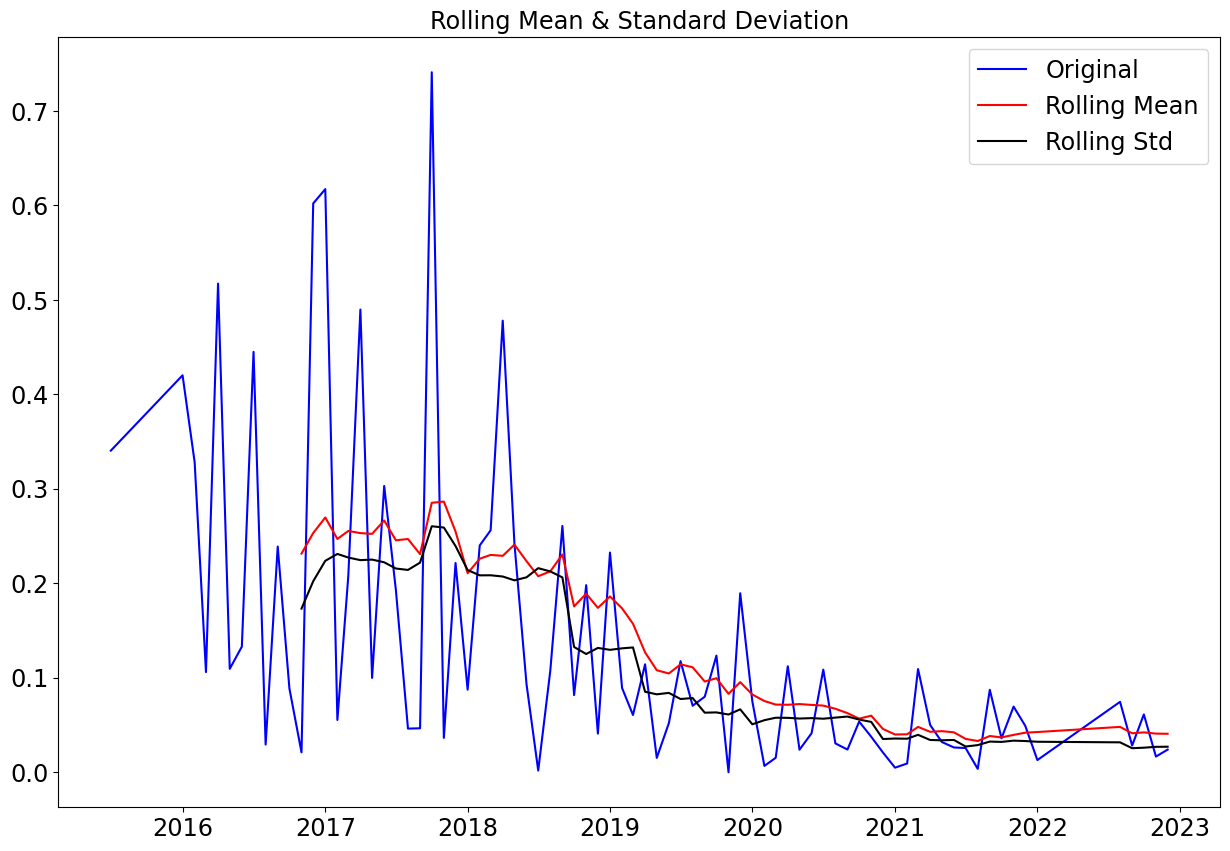

Results of Dickey-Fuller Test:
Test Statistic                 -0.531811
p-value                         0.885658
#Lags Used                     10.000000
Number of Observations Used    68.000000
Critical Value (1%)            -3.530399
Critical Value (5%)            -2.905087
Critical Value (10%)           -2.590001
dtype: float64
None




___________________________________________________________________________________________________________________________


							 CPBU 



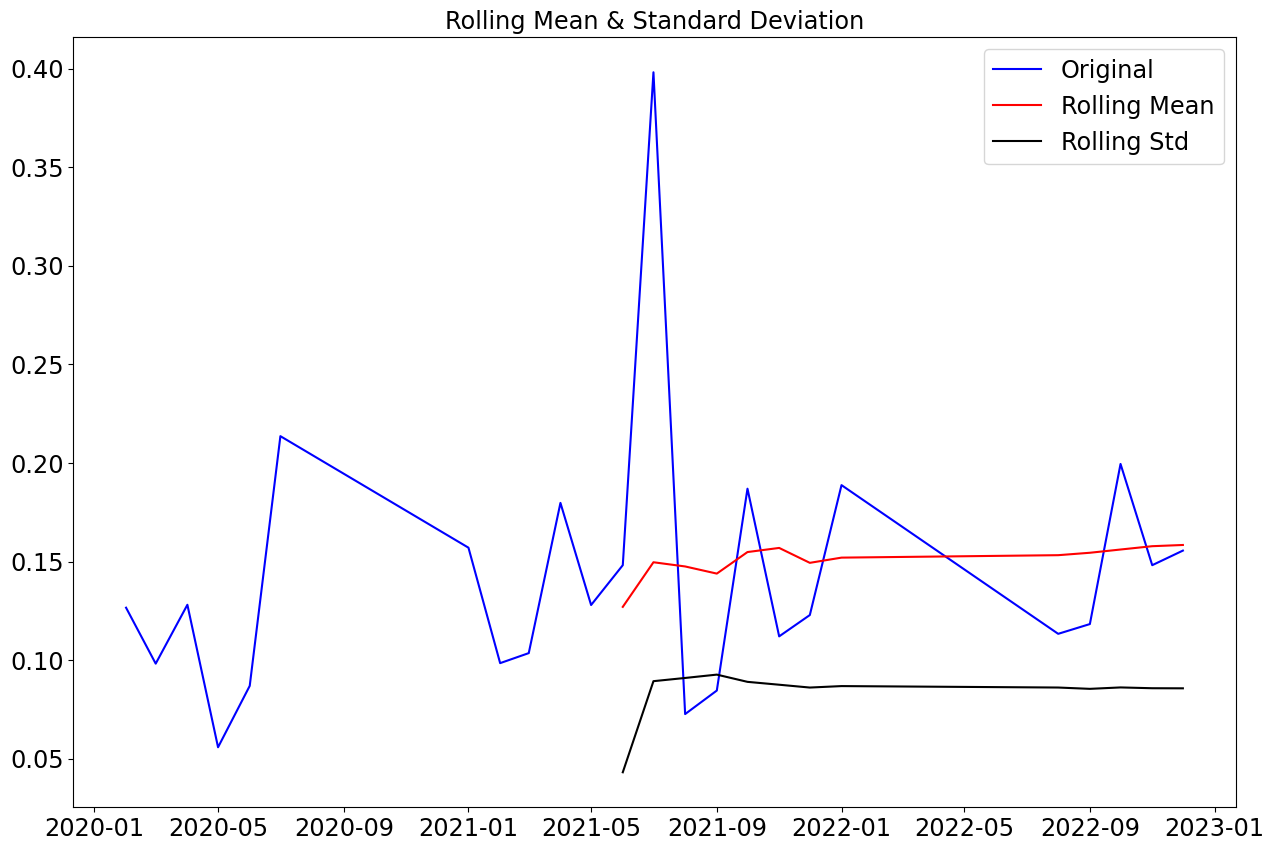

Results of Dickey-Fuller Test:
Test Statistic                 -4.624009
p-value                         0.000117
#Lags Used                      1.000000
Number of Observations Used    22.000000
Critical Value (1%)            -3.769733
Critical Value (5%)            -3.005426
Critical Value (10%)           -2.642501
dtype: float64
None




___________________________________________________________________________________________________________________________


							 CRBU 



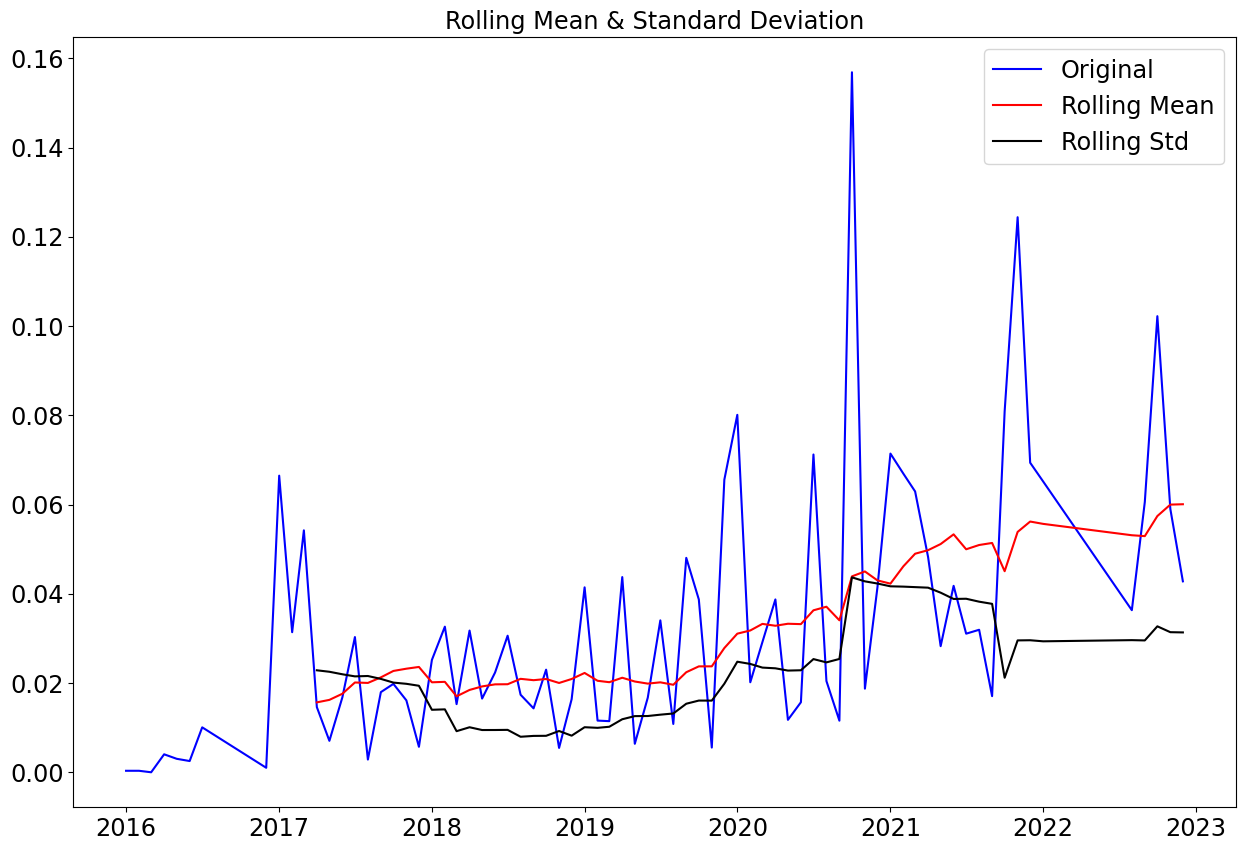

Results of Dickey-Fuller Test:
Test Statistic                  0.618582
p-value                         0.988065
#Lags Used                     12.000000
Number of Observations Used    61.000000
Critical Value (1%)            -3.542413
Critical Value (5%)            -2.910236
Critical Value (10%)           -2.592745
dtype: float64
None




___________________________________________________________________________________________________________________________


							 CSA 



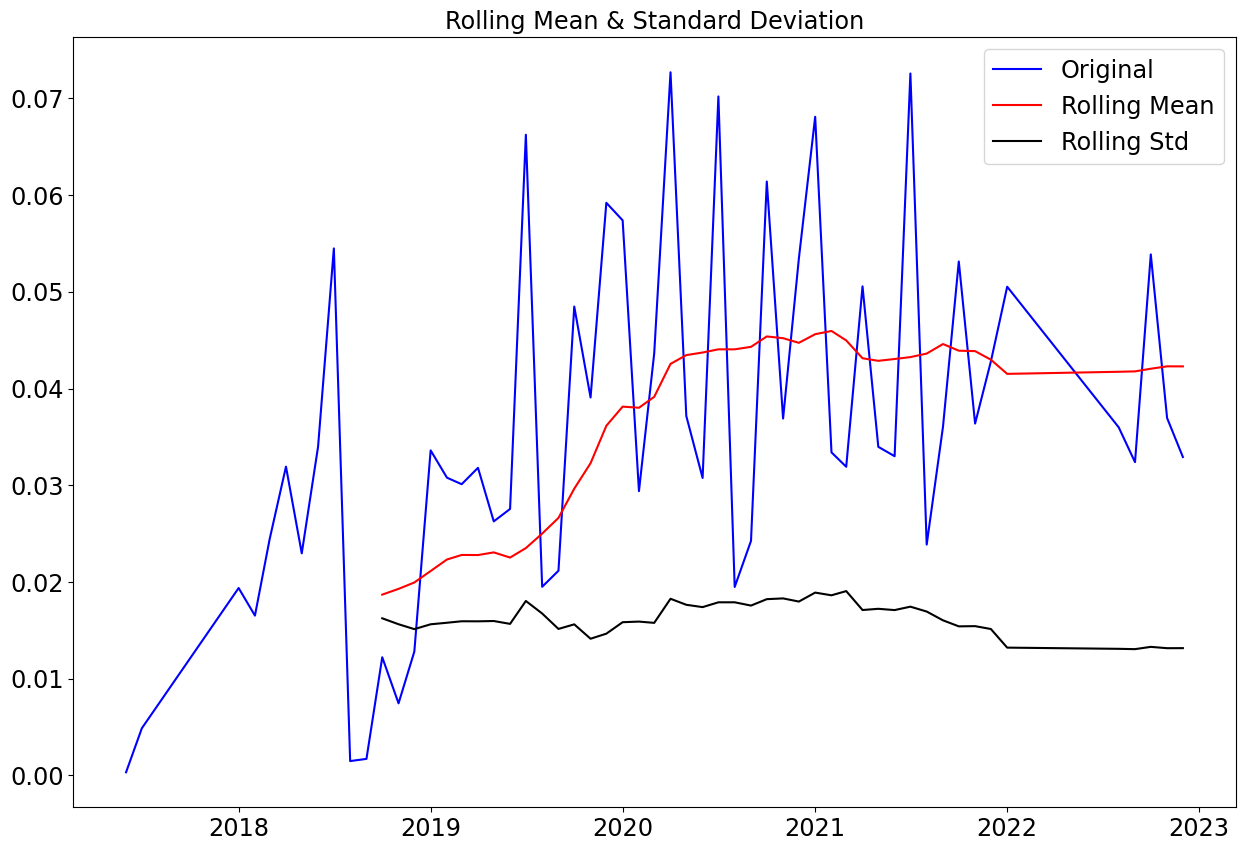

Results of Dickey-Fuller Test:
Test Statistic                 -2.270868
p-value                         0.181536
#Lags Used                     11.000000
Number of Observations Used    44.000000
Critical Value (1%)            -3.588573
Critical Value (5%)            -2.929886
Critical Value (10%)           -2.603185
dtype: float64
None




___________________________________________________________________________________________________________________________


							 CVEBU 



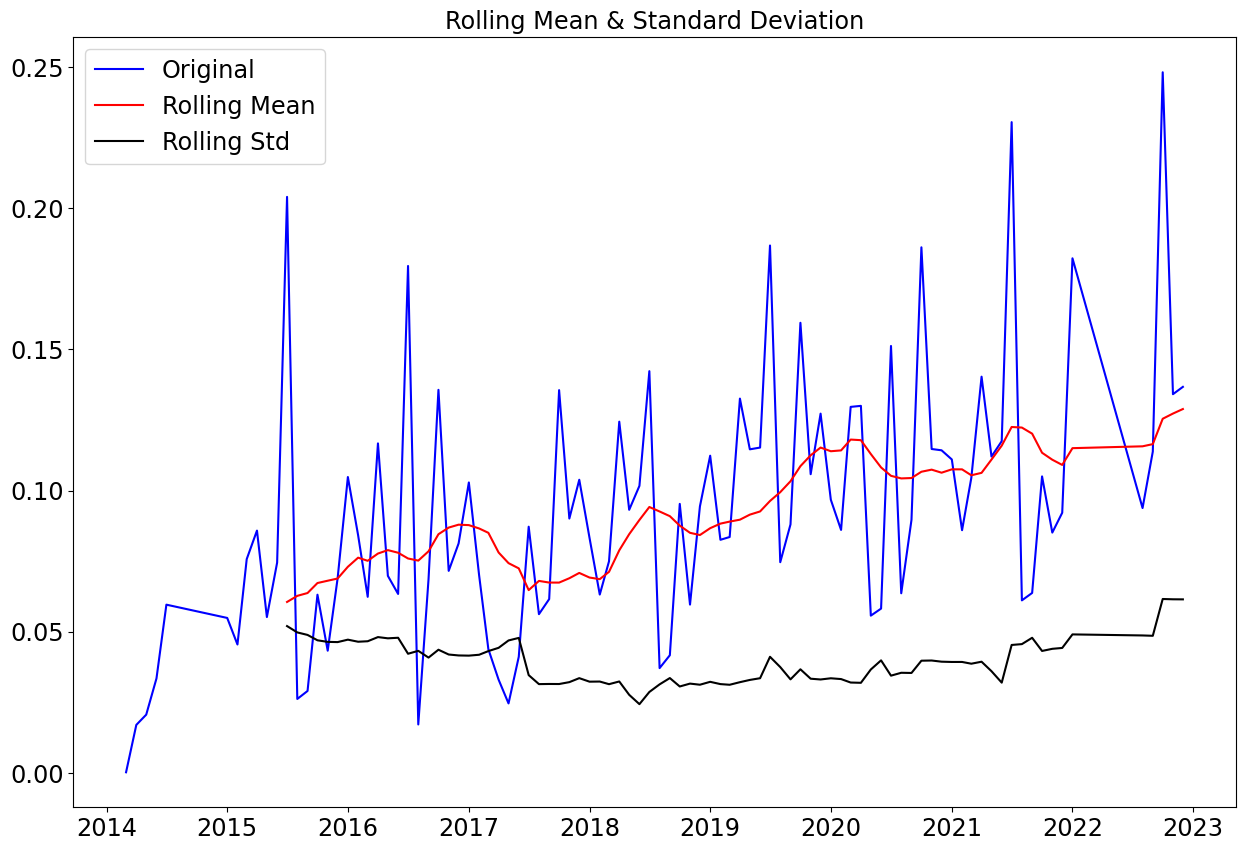

Results of Dickey-Fuller Test:
Test Statistic                 -0.672558
p-value                         0.853730
#Lags Used                     12.000000
Number of Observations Used    82.000000
Critical Value (1%)            -3.512738
Critical Value (5%)            -2.897490
Critical Value (10%)           -2.585949
dtype: float64
None




___________________________________________________________________________________________________________________________


							 EBBU 



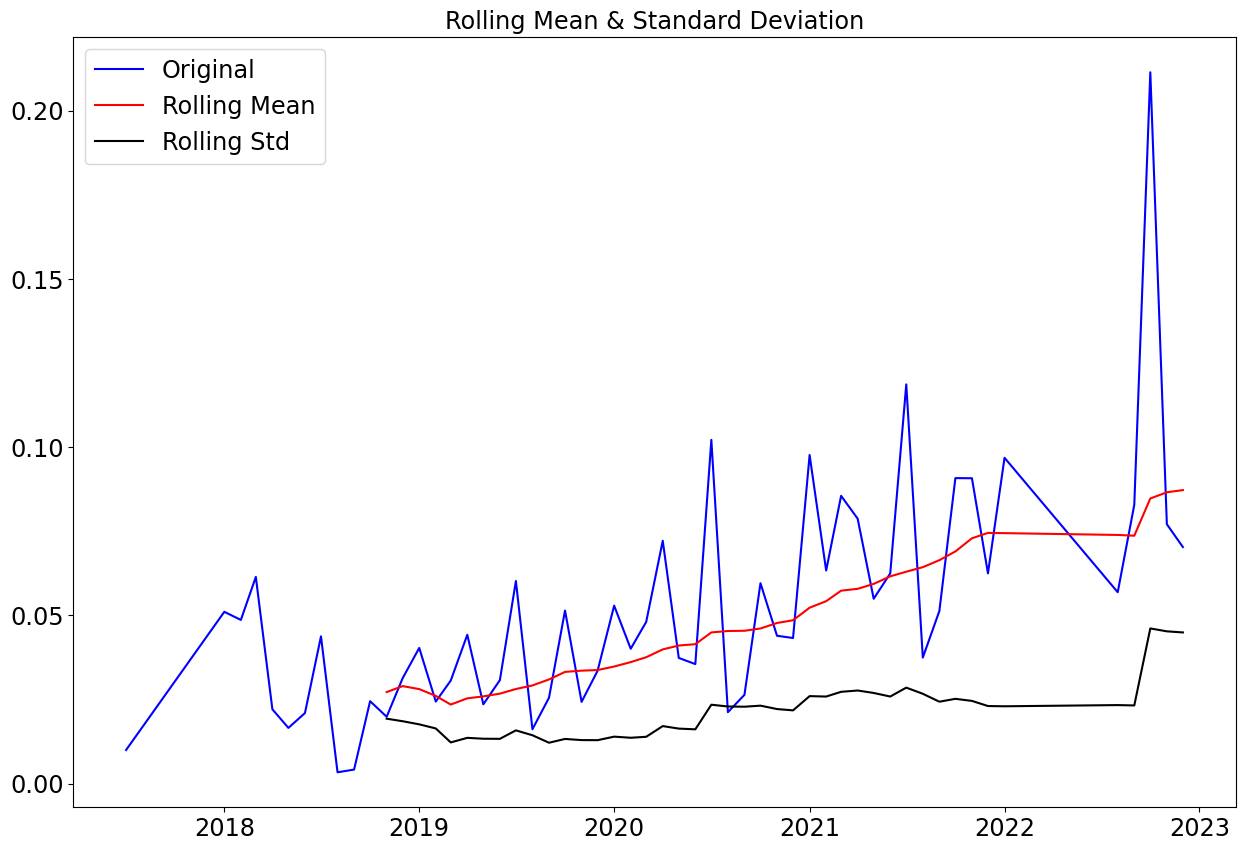

Results of Dickey-Fuller Test:
Test Statistic                  1.936901
p-value                         0.998585
#Lags Used                     11.000000
Number of Observations Used    43.000000
Critical Value (1%)            -3.592504
Critical Value (5%)            -2.931550
Critical Value (10%)           -2.604066
dtype: float64
None




___________________________________________________________________________________________________________________________


							 ECBU 



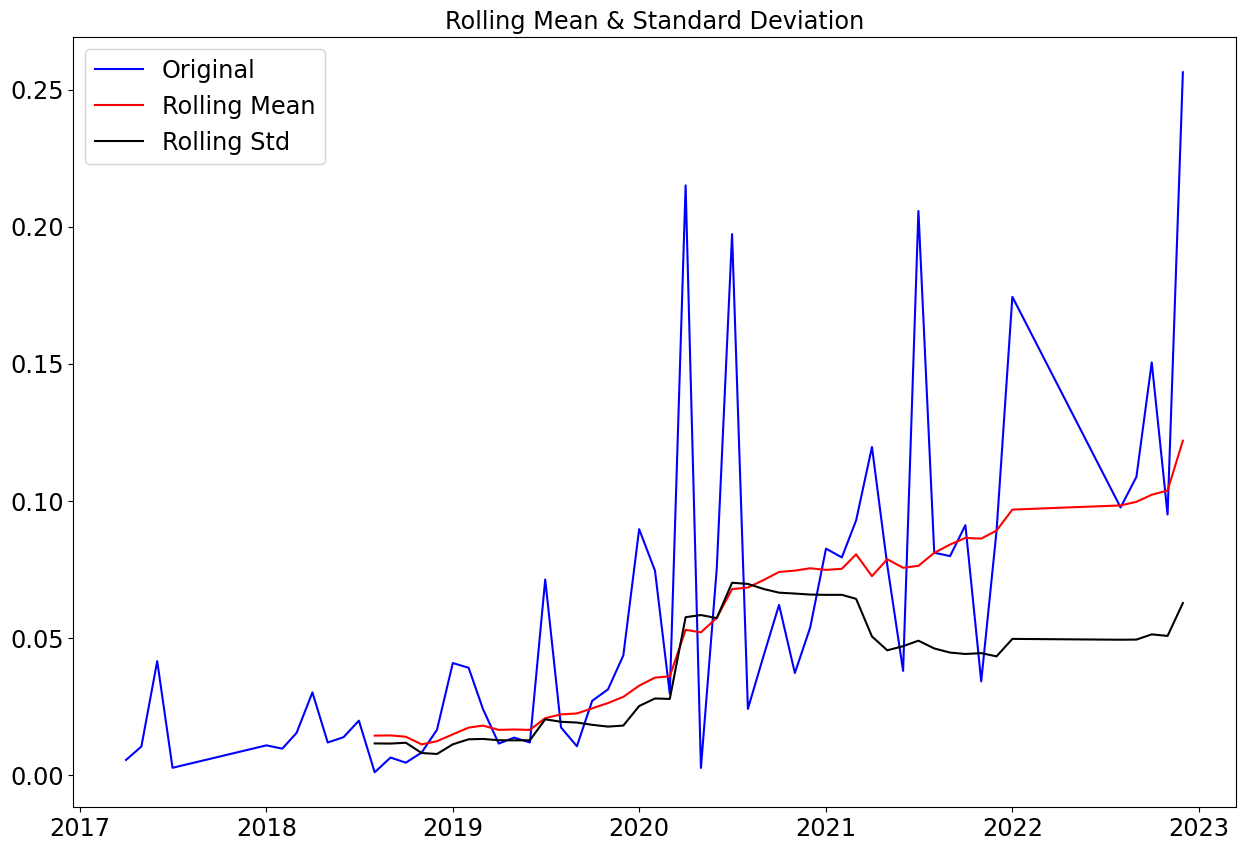

Results of Dickey-Fuller Test:
Test Statistic                 -0.374500
p-value                         0.914270
#Lags Used                      2.000000
Number of Observations Used    55.000000
Critical Value (1%)            -3.555273
Critical Value (5%)            -2.915731
Critical Value (10%)           -2.595670
dtype: float64
None




___________________________________________________________________________________________________________________________


							 ERBU 



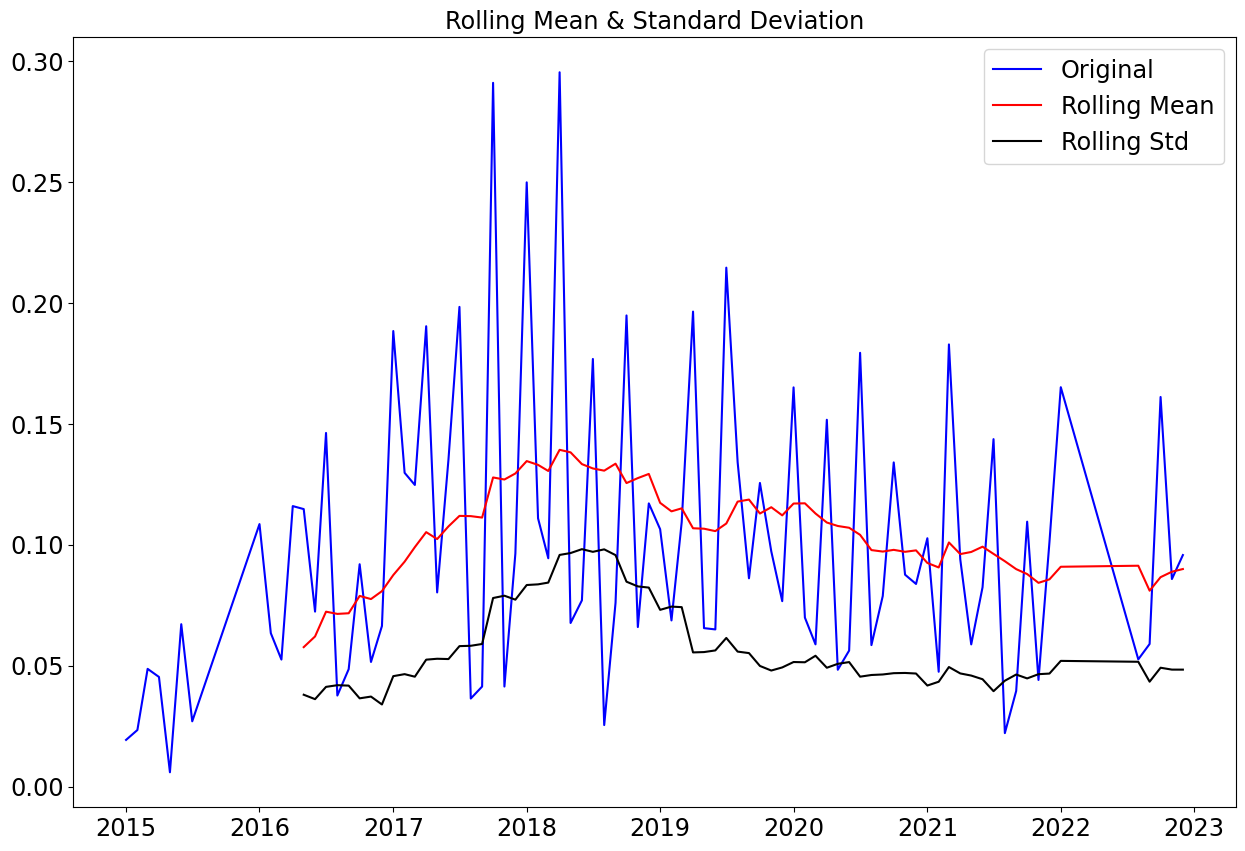

Results of Dickey-Fuller Test:
Test Statistic                 -2.693673
p-value                         0.075140
#Lags Used                      7.000000
Number of Observations Used    77.000000
Critical Value (1%)            -3.518281
Critical Value (5%)            -2.899878
Critical Value (10%)           -2.587223
dtype: float64
None




___________________________________________________________________________________________________________________________


							 QKBU 



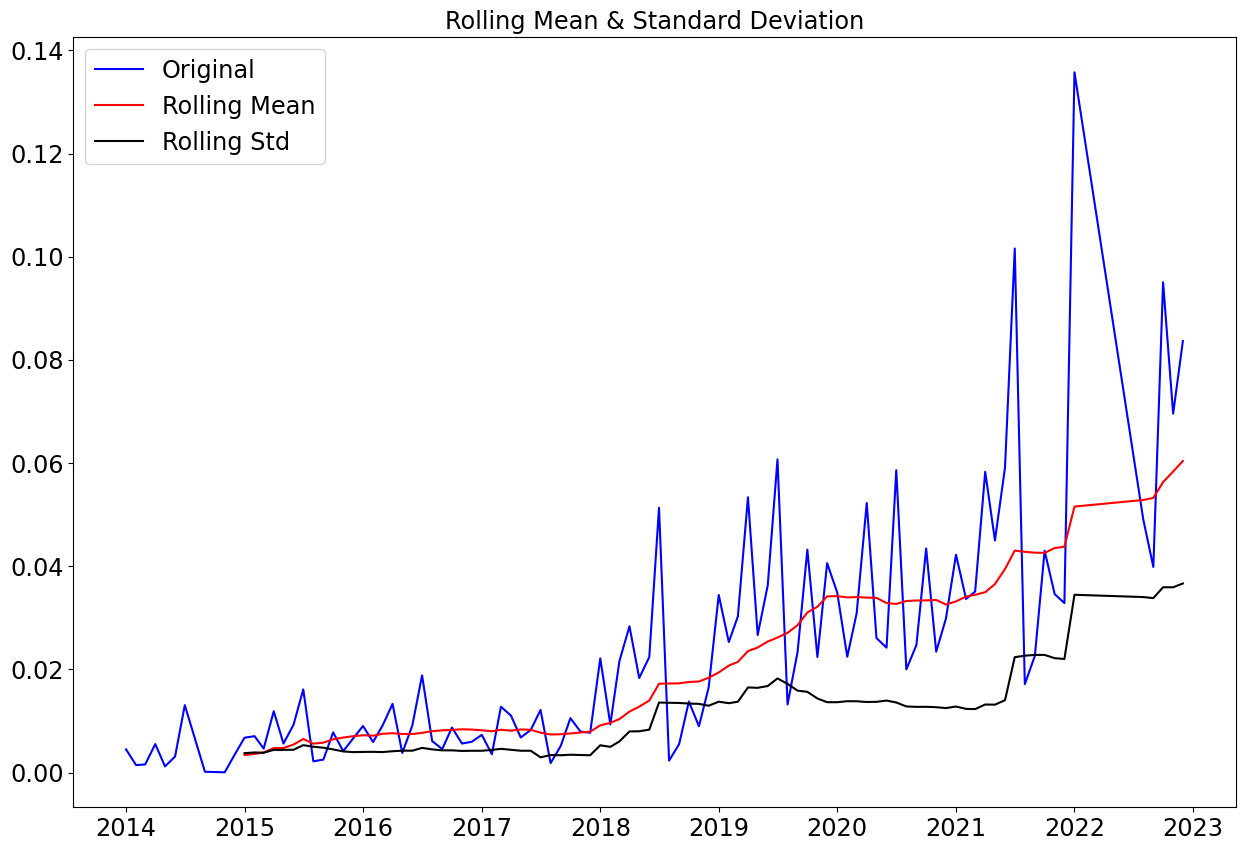

Results of Dickey-Fuller Test:
Test Statistic                  2.204613
p-value                         0.998886
#Lags Used                     12.000000
Number of Observations Used    88.000000
Critical Value (1%)            -3.506944
Critical Value (5%)            -2.894990
Critical Value (10%)           -2.584615
dtype: float64
None




___________________________________________________________________________________________________________________________


							 IOTBU 



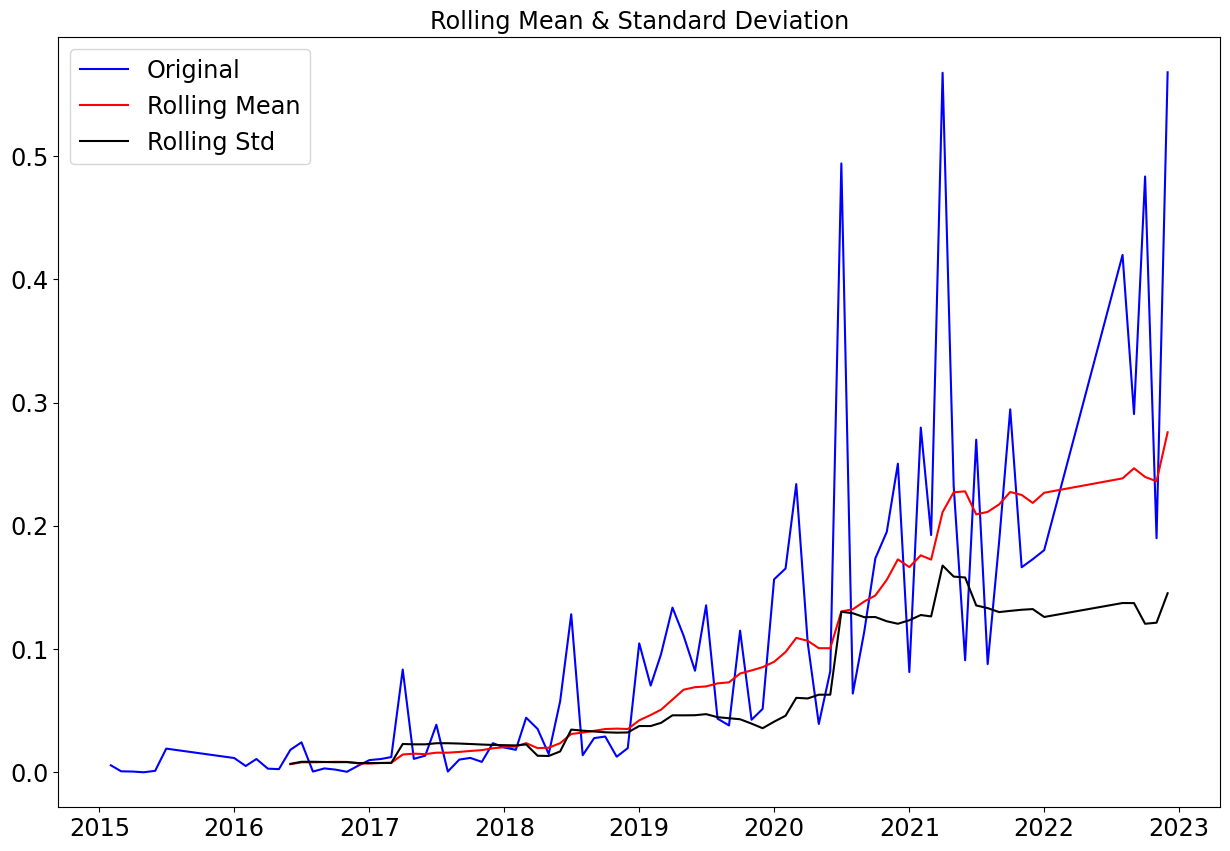

Results of Dickey-Fuller Test:
Test Statistic                  1.765162
p-value                         0.998277
#Lags Used                     11.000000
Number of Observations Used    72.000000
Critical Value (1%)            -3.524624
Critical Value (5%)            -2.902607
Critical Value (10%)           -2.588679
dtype: float64
None




___________________________________________________________________________________________________________________________


							 NGFWBU 



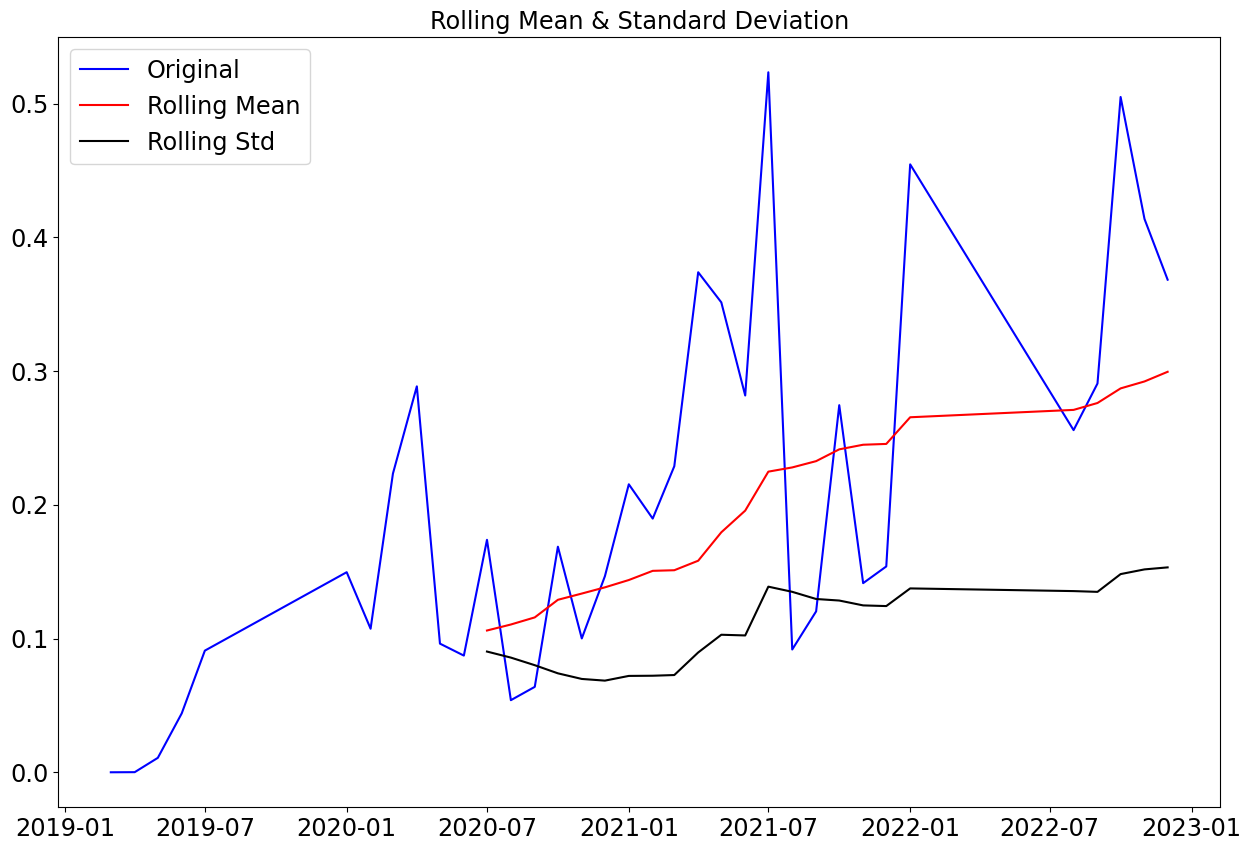

Results of Dickey-Fuller Test:
Test Statistic                 -0.575376
p-value                         0.876449
#Lags Used                      5.000000
Number of Observations Used    29.000000
Critical Value (1%)            -3.679060
Critical Value (5%)            -2.967882
Critical Value (10%)           -2.623158
dtype: float64
None




___________________________________________________________________________________________________________________________


							 OTBU 



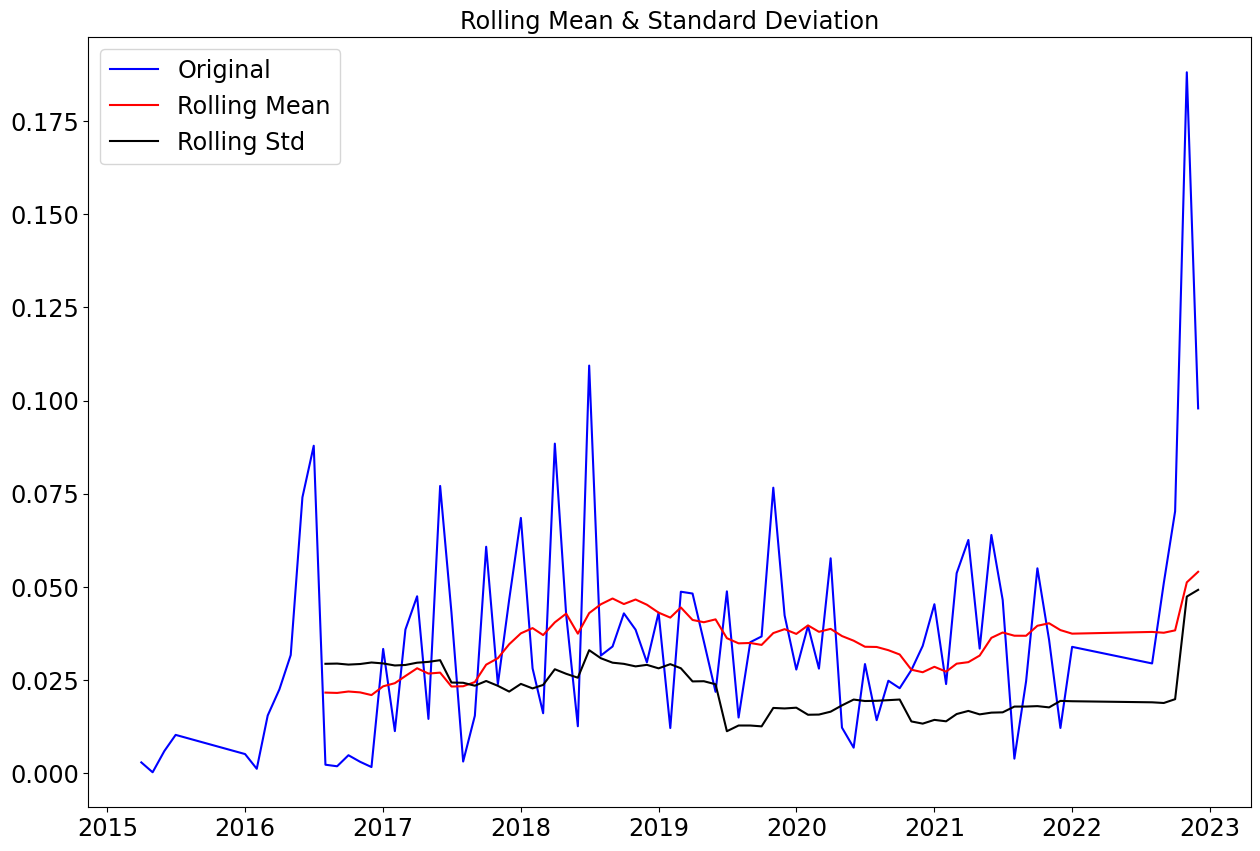

Results of Dickey-Fuller Test:
Test Statistic                 -3.126206
p-value                         0.024674
#Lags Used                      4.000000
Number of Observations Used    77.000000
Critical Value (1%)            -3.518281
Critical Value (5%)            -2.899878
Critical Value (10%)           -2.587223
dtype: float64
None




___________________________________________________________________________________________________________________________


							 BATBU 



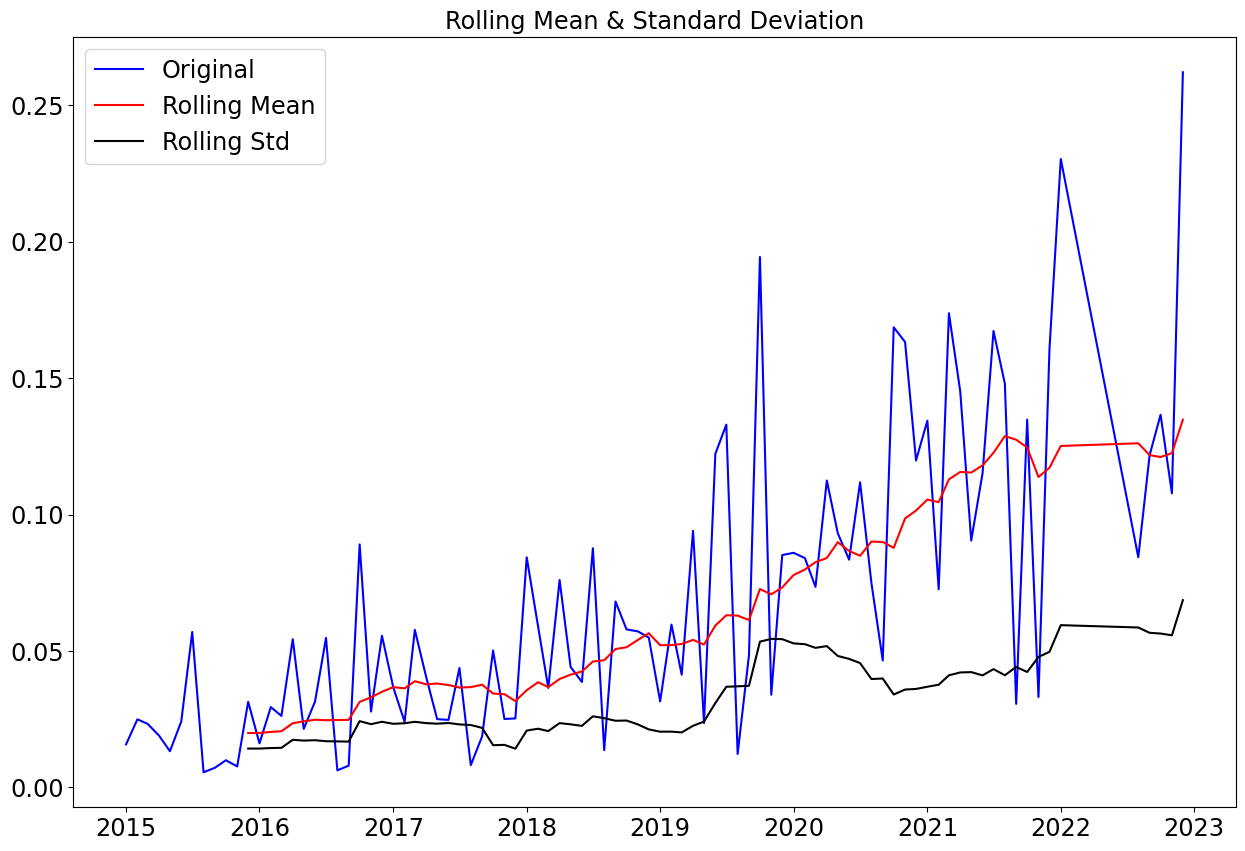

Results of Dickey-Fuller Test:
Test Statistic                  0.151892
p-value                         0.969431
#Lags Used                      5.000000
Number of Observations Used    84.000000
Critical Value (1%)            -3.510712
Critical Value (5%)            -2.896616
Critical Value (10%)           -2.585482
dtype: float64
None




___________________________________________________________________________________________________________________________


							 SRSBU 



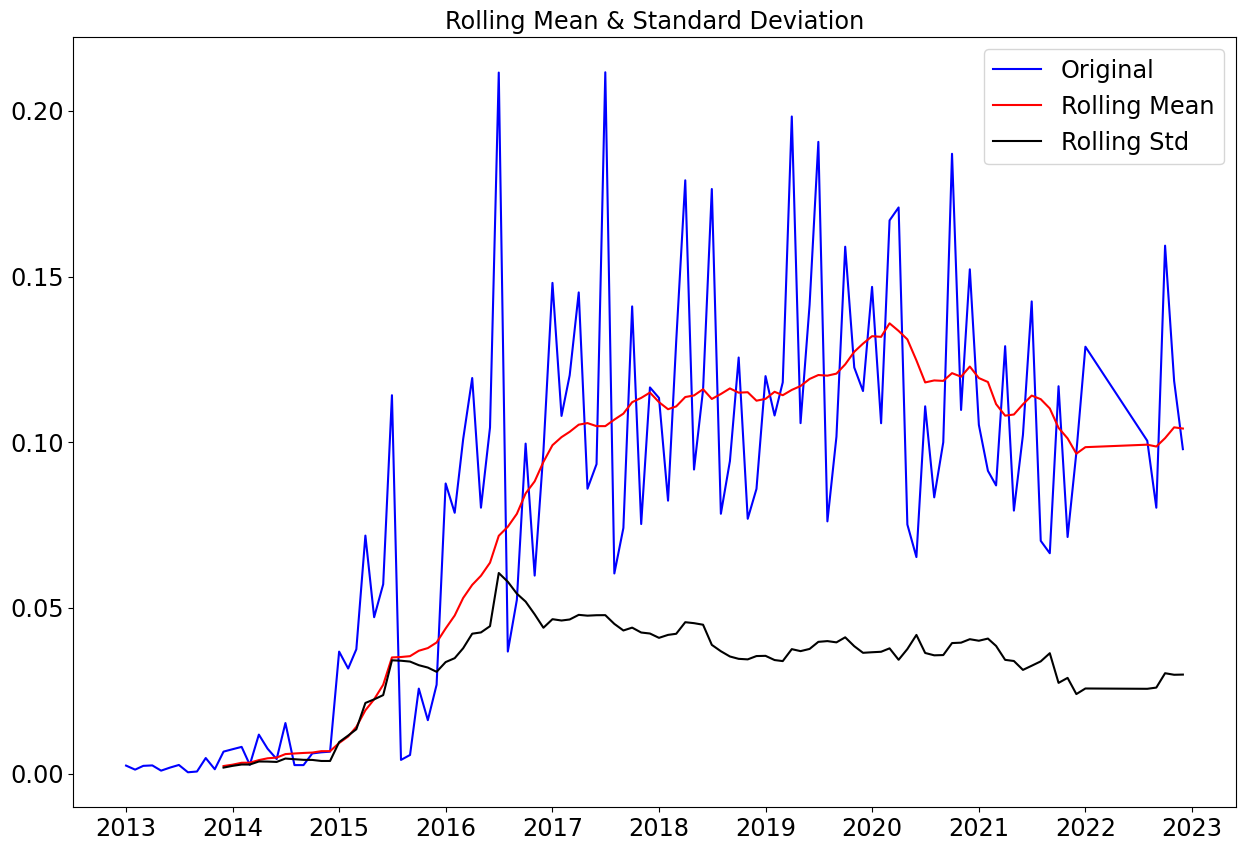

Results of Dickey-Fuller Test:
Test Statistic                  -2.002978
p-value                          0.285269
#Lags Used                      12.000000
Number of Observations Used    101.000000
Critical Value (1%)             -3.496818
Critical Value (5%)             -2.890611
Critical Value (10%)            -2.582277
dtype: float64
None




___________________________________________________________________________________________________________________________


							 TOASTBU 



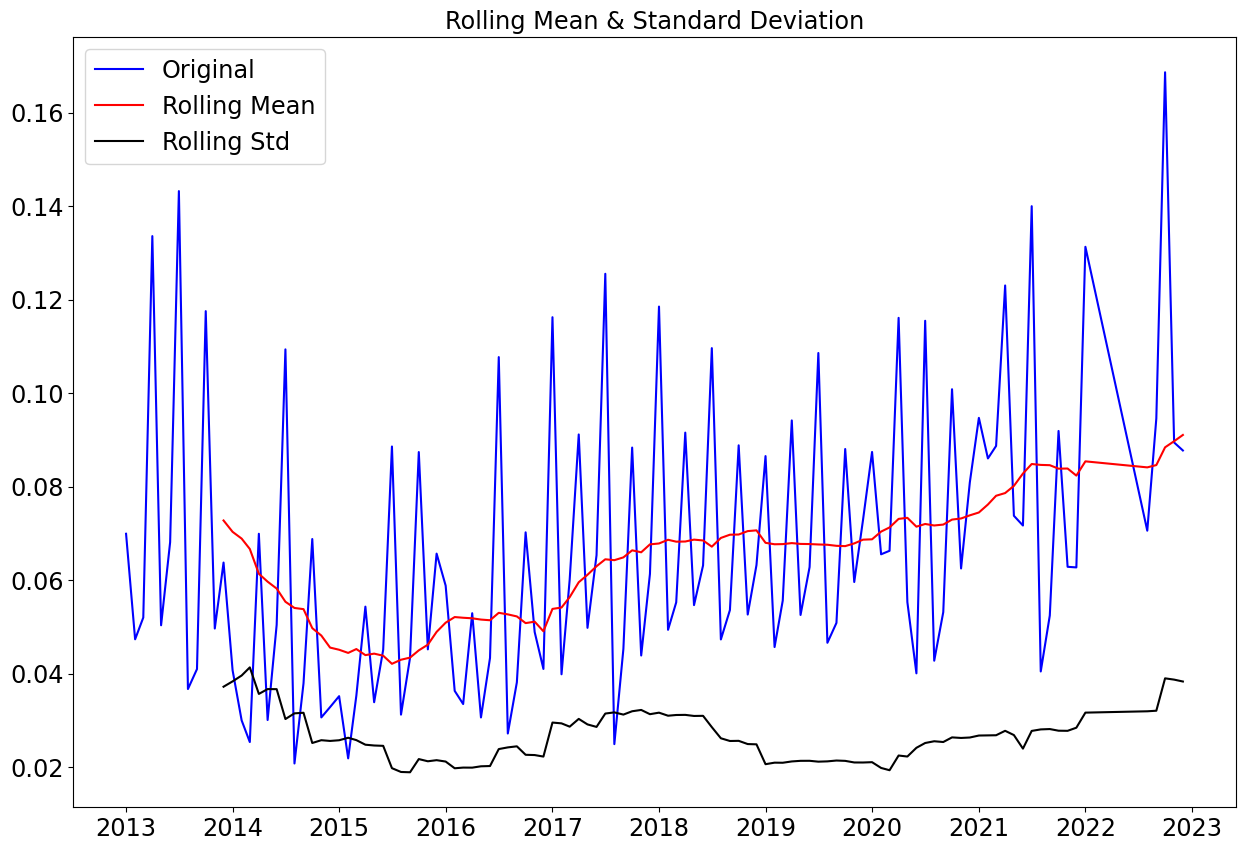

Results of Dickey-Fuller Test:
Test Statistic                   0.047780
p-value                          0.962310
#Lags Used                      13.000000
Number of Observations Used    100.000000
Critical Value (1%)             -3.497501
Critical Value (5%)             -2.890906
Critical Value (10%)            -2.582435
dtype: float64
None




___________________________________________________________________________________________________________________________


							 UOPBLRBU 



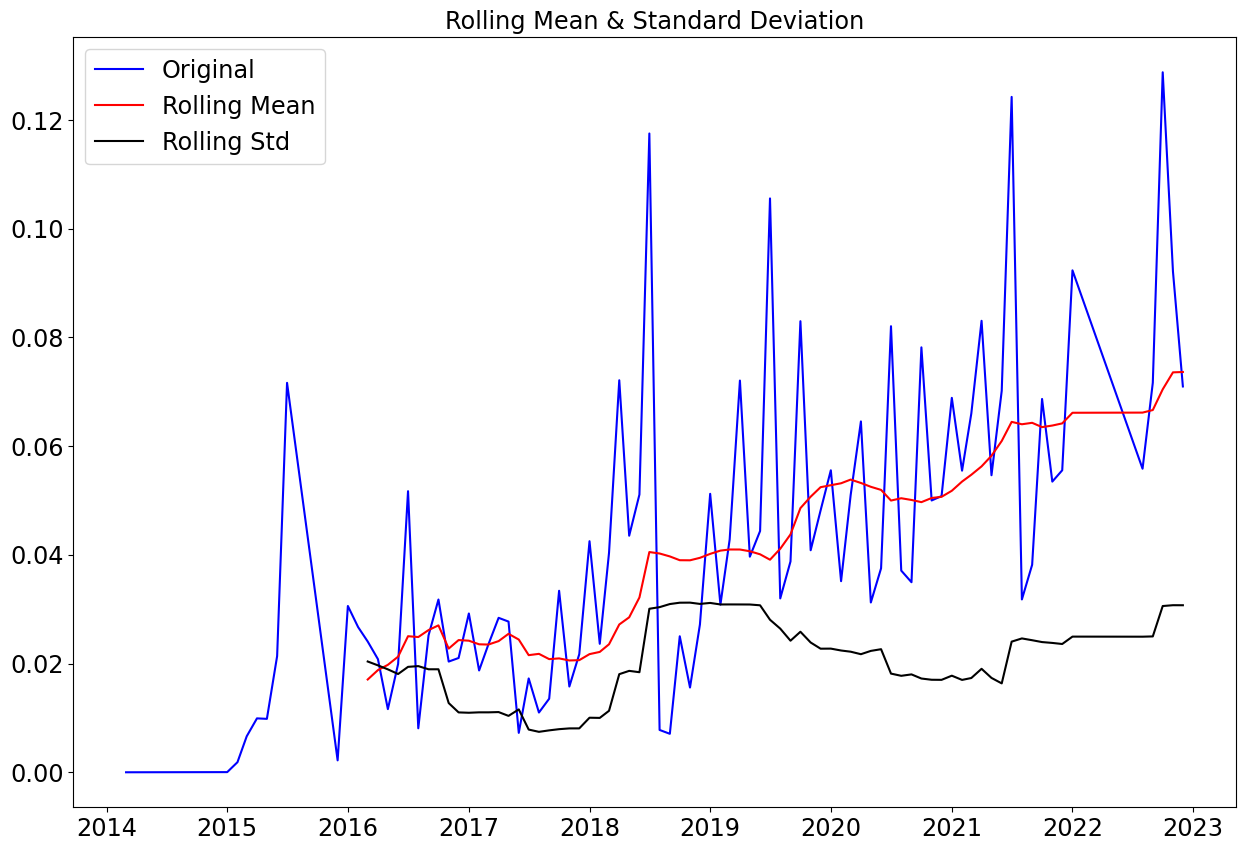

Results of Dickey-Fuller Test:
Test Statistic                  0.224679
p-value                         0.973612
#Lags Used                     11.000000
Number of Observations Used    75.000000
Critical Value (1%)            -3.520713
Critical Value (5%)            -2.900925
Critical Value (10%)           -2.587781
dtype: float64
None




___________________________________________________________________________________________________________________________


							 UCEBU 



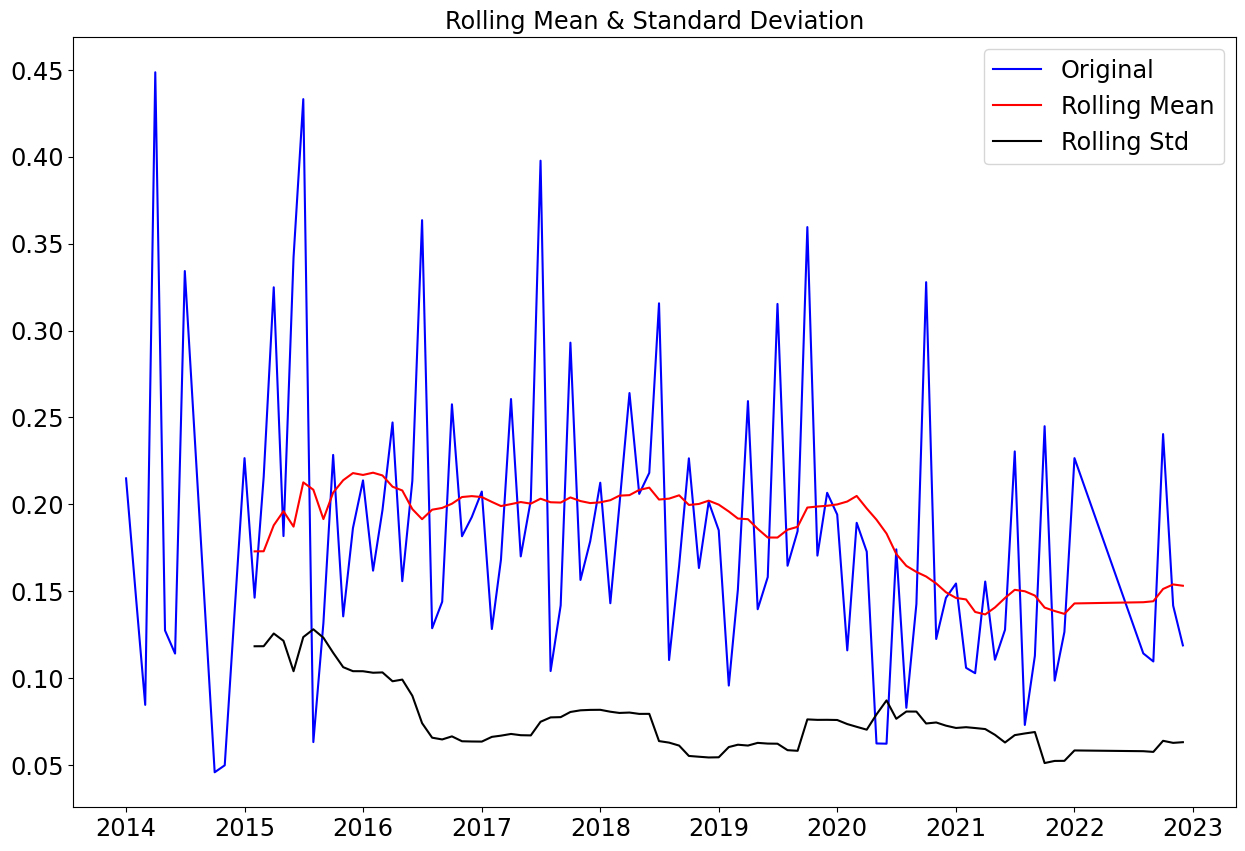

Results of Dickey-Fuller Test:
Test Statistic                 -1.012102
p-value                         0.748825
#Lags Used                     11.000000
Number of Observations Used    88.000000
Critical Value (1%)            -3.506944
Critical Value (5%)            -2.894990
Critical Value (10%)           -2.584615
dtype: float64
None




___________________________________________________________________________________________________________________________


							 RTOBU 



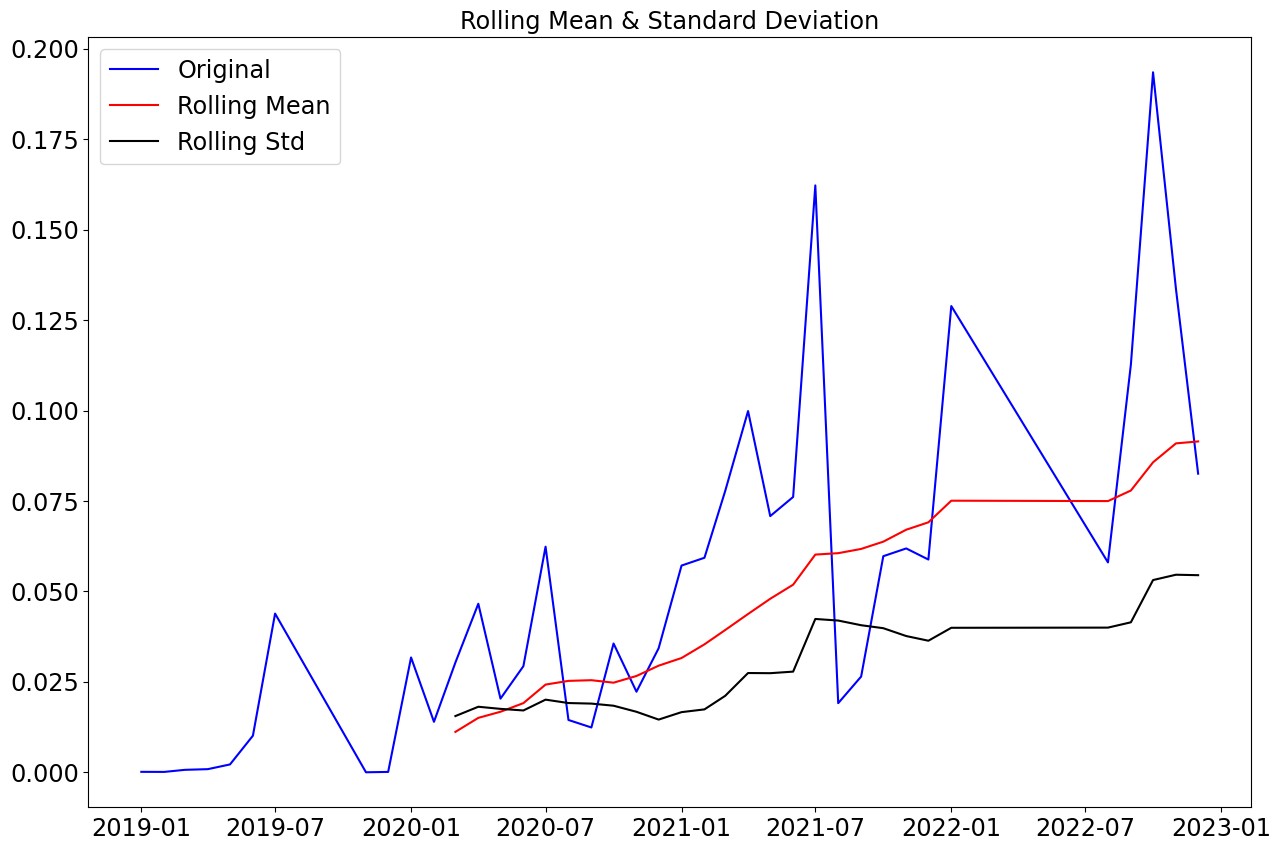

Results of Dickey-Fuller Test:
Test Statistic                 -0.041677
p-value                         0.954947
#Lags Used                      8.000000
Number of Observations Used    30.000000
Critical Value (1%)            -3.669920
Critical Value (5%)            -2.964071
Critical Value (10%)           -2.621171
dtype: float64
None


In [279]:
class color:
        BOLD = '\033[1m'
        UNDERLINE = '\033[4m'
        END = '\033[0m'
for i in range(0,len(business_unit)):
    print('\n\n\n\n___________________________________________________________________________________________________________________________')
    print(color.BOLD  + '\n\n\t\t\t\t\t\t\t %s \n'% business_unit[i] + color.END)
    print(test_stationarity(diff_business_unit(business_unit[i]).booked_qty))